In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re

In [13]:
file_to_load = os.path.join('..','Resources','pokemon.csv')
pokemon_df = pd.read_csv(file_to_load)
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [14]:
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [15]:
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [16]:
pokemon_df[pokemon_df['weight_kg'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [17]:
len(pokemon_df)

801

In [18]:
100 * len(pokemon_df[pokemon_df['weight_kg'].isna()]) / len(pokemon_df)

2.4968789013732833

In [19]:
pokemon_df[pokemon_df['height_m'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [20]:
pokemon_df[pokemon_df['percentage_male'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,NaN,81,95,55,45,electric,steel,6.0,1,0
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,NaN,82,120,70,70,electric,steel,60.0,1,0
99,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,NaN,100,55,55,100,electric,NaN,10.4,1,0
100,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,NaN,101,80,80,150,electric,NaN,66.6,1,0
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,...,NaN,120,70,55,85,water,NaN,34.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.50,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.00,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.00,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.00,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [23]:
pokemon_df.columns.get_loc('percentage_male')

31

In [27]:
clean_pokemon_df = pokemon_df.loc[:,pokemon_df.columns != 'percentage_male']
'percentage_male' in clean_pokemon_df.columns

False

In [29]:
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        49
base_egg_steps      

In [33]:
pokemon_df[pokemon_df['height_m'].isna()]['name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

In [34]:
clean_pokemon_df.loc[18,'height_m'] = 0.3 
clean_pokemon_df.loc[18,'weight_kg'] = 3.5 

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
clean_pokemon_df.loc[18,'height_m']

0.3

In [60]:
clean_pokemon_df.loc[19,'height_m'] = 0.7 
clean_pokemon_df.loc[19,'weight_kg'] = 18.5

In [61]:
clean_pokemon_df.loc[25,'height_m'] = 0.8 
clean_pokemon_df.loc[25,'weight_kg'] = 30.0

In [62]:
clean_pokemon_df.loc[26,'height_m'] = 0.6 
clean_pokemon_df.loc[26,'weight_kg'] = 12.0

In [63]:
clean_pokemon_df.loc[27,'height_m'] = 1.0 
clean_pokemon_df.loc[27,'weight_kg'] = 29.5

In [64]:
clean_pokemon_df.loc[36,'height_m'] = 0.6
clean_pokemon_df.loc[36,'weight_kg'] = 9.9

In [65]:
clean_pokemon_df.loc[37,'height_m'] = 1.1
clean_pokemon_df.loc[37,'weight_kg'] = 19.9

In [66]:
clean_pokemon_df.loc[49,'height_m'] = 0.2 
clean_pokemon_df.loc[49,'weight_kg'] = 0.8

In [67]:
clean_pokemon_df.loc[50,'height_m'] = 0.7
clean_pokemon_df.loc[50,'weight_kg'] = 33.3

In [68]:
clean_pokemon_df.loc[51,'height_m'] = 0.4
clean_pokemon_df.loc[51,'weight_kg'] = 4.2

In [69]:
clean_pokemon_df.loc[52,'height_m'] = 1.0
clean_pokemon_df.loc[52,'weight_kg'] = 32.0

In [70]:
clean_pokemon_df.loc[73,'height_m'] = 0.4
clean_pokemon_df.loc[73,'weight_kg'] = 20.0

In [71]:
clean_pokemon_df.loc[74,'height_m'] = 1.0
clean_pokemon_df.loc[74,'weight_kg'] = 105.0

In [72]:
clean_pokemon_df.loc[75,'height_m'] = 1.4
clean_pokemon_df.loc[75,'weight_kg'] = 300.0

In [73]:
clean_pokemon_df.loc[87,'height_m'] = 0.9
clean_pokemon_df.loc[87,'weight_kg'] = 30.0

In [74]:
clean_pokemon_df.loc[88,'height_m'] = 1.2
clean_pokemon_df.loc[88,'weight_kg'] = 30.0

In [75]:
clean_pokemon_df.loc[102,'height_m'] = 2.0
clean_pokemon_df.loc[102,'weight_kg'] = 120.0

In [76]:
clean_pokemon_df.loc[104,'height_m'] = 1.0
clean_pokemon_df.loc[104,'weight_kg'] = 45.0

In [77]:
clean_pokemon_df.loc[719,'height_m'] = 0.5
clean_pokemon_df.loc[719,'weight_kg'] = 9.0

In [78]:
clean_pokemon_df.loc[744,'height_m'] = 0.9
clean_pokemon_df.loc[744,'weight_kg'] = 25.0

In [79]:
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0
is_legendary           0


In [86]:
none_series = clean_pokemon_df[clean_pokemon_df['type2'].isna()]['type2'].apply(lambda x: 'None')

In [99]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'] = 2

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'].map(lambda x: 'None') 

3      None
4      None
6      None
7      None
8      None
       ... 
781    None
788    None
789    None
795    None
799    None
Name: type2, Length: 384, dtype: object

In [105]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'].apply(lambda x: 'None')

3      None
4      None
6      None
7      None
8      None
       ... 
781    None
788    None
789    None
795    None
799    None
Name: type2, Length: 384, dtype: object

In [106]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2']

3      NaN
4      NaN
6      NaN
7      NaN
8      NaN
      ... 
781    NaN
788    NaN
789    NaN
795    NaN
799    NaN
Name: type2, Length: 384, dtype: object

In [108]:
clean_pokemon_df = clean_pokemon_df.replace(np.nan, 'none')

In [109]:
clean_pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0


In [110]:
clean_pokemon_df.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

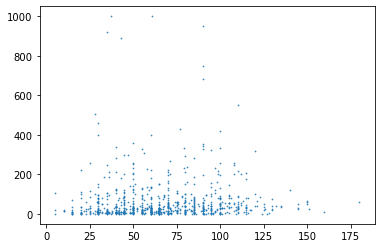

In [118]:
plt.scatter(clean_pokemon_df['speed'],clean_pokemon_df['weight_kg'], s = 0.6, alpha = 0.8)

In [130]:
happiness = clean_pokemon_df.groupby('is_legendary').mean()['base_happiness']
happiness

is_legendary
0    67.865937
1    39.214286
Name: base_happiness, dtype: float64

In [129]:
happiness[0]

67.86593707250341

<BarContainer object of 2 artists>

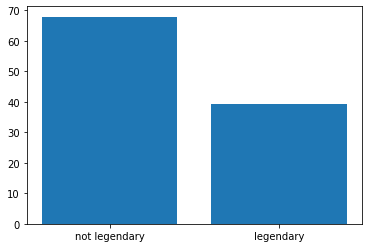

In [132]:
plt.bar(['not legendary', 'legendary'],[happiness[0], happiness[1]])

In [139]:
generations = clean_pokemon_df.groupby('generation').count()
generations

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
6,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
7,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [145]:
generations_list = generations.index.tolist()

In [146]:
generations['name']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64

<BarContainer object of 7 artists>

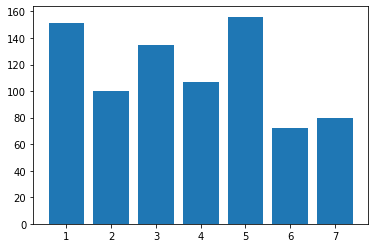

In [147]:
plt.bar(generations_list, generations['name'])

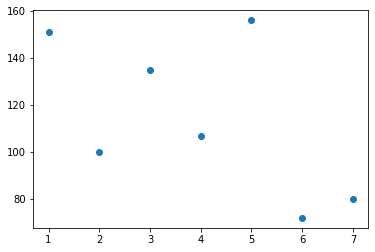

In [148]:
plt.scatter(generations_list, generations['name'])

In [149]:
clean_pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,800,127,89,79,psychic,none,230.0,7,1


In [182]:
clean_pokemon_df.corr().iloc[:,18:]

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
against_bug,-0.054175,0.062133,0.009994,-0.012398,-0.036474,0.035717,-0.053908,0.034897,0.004618,0.055352,-0.002342,-0.043802,-0.026321,-0.001549,0.027864
against_dark,-0.098849,0.187220,0.024155,0.065446,0.048039,-0.008391,0.016473,0.010589,0.009066,0.170849,0.132507,-0.000326,0.035384,-0.016013,0.136315
against_dragon,0.138217,0.164773,-0.151915,0.069766,-0.023794,0.172547,0.163279,0.089721,0.000872,0.039739,-0.047416,0.078123,0.125013,-0.025201,0.014844
against_electric,-0.104276,-0.061970,0.030411,-0.017137,-0.072433,-0.041584,0.008831,-0.035354,-0.068552,0.022305,0.019193,0.111422,-0.101647,-0.063180,-0.023151
against_fairy,0.207526,0.120594,-0.209323,0.098948,0.001655,0.146370,0.116623,0.129284,0.176651,-0.010296,0.002754,0.065401,0.099975,0.150801,0.050165
against_fight,0.149123,-0.006359,-0.088722,0.048629,0.150424,0.010407,0.054407,0.109425,0.018296,-0.118481,-0.044460,-0.050495,0.160491,0.000681,-0.059132
against_fire,-0.005762,-0.044802,0.007441,-0.061698,0.037921,-0.027136,-0.080915,-0.099242,0.052012,-0.088578,-0.019520,-0.079129,-0.042872,0.061157,-0.011073
against_flying,-0.002991,-0.091304,0.056480,-0.106586,-0.127950,0.019100,-0.066974,-0.060624,0.020324,-0.111243,-0.079022,-0.043381,-0.124583,0.058204,-0.062214
against_ghost,-0.034549,0.174115,-0.037205,0.114179,0.136490,0.059262,0.033627,-0.062052,0.063189,0.233309,0.195439,-0.029007,0.048000,0.038027,0.170746
against_grass,0.036787,-0.064971,0.063475,-0.017340,0.139542,-0.039623,0.022892,0.056886,-0.092353,-0.093899,-0.056427,-0.153618,0.056351,-0.107987,-0.070826


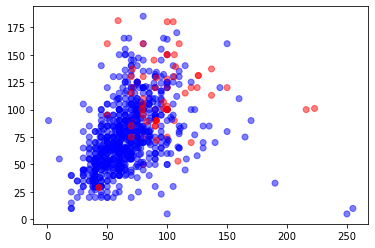

In [173]:
rarity_dict = {0:'blue', 1:'red'}
plt.scatter(clean_pokemon_df['hp'],clean_pokemon_df['attack'], c = clean_pokemon_df['is_legendary'].map(rarity_dict), alpha=0.5)

In [187]:
typing_info = clean_pokemon_df.groupby('type1').mean().iloc[:,18:]
typing_info

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,
bug,70.125000,5617.777778,67.083333,380.430556,70.847222,1.009006e+06,0.883333,56.722222,395.916667,56.652778,62.513889,63.569444,33.083333,3.763889,0.041667
dark,87.793103,8386.206897,42.241379,449.758621,70.517241,1.102720e+06,1.296552,72.551724,490.034483,74.517241,69.068966,75.310345,69.096552,4.275862,0.103448
dragon,106.407407,15265.185185,42.962963,522.777778,86.259259,1.216667e+06,1.937037,79.851852,516.296296,89.592593,84.555556,76.111111,107.125926,4.296296,0.259259
electric,70.820513,7056.410256,68.461538,436.153846,61.820513,1.073312e+06,0.976923,60.512821,380.102564,87.538462,70.051282,85.410256,37.741026,3.461538,0.128205
fairy,62.111111,5902.222222,77.777778,427.166667,68.166667,9.138889e+05,0.794444,73.944444,467.000000,81.500000,87.777778,53.666667,23.555556,4.277778,0.055556
fighting,99.178571,5577.142857,70.000000,414.821429,66.392857,1.076021e+06,1.196429,71.428571,404.035714,50.107143,63.428571,64.285714,58.675000,3.750000,0.000000
fire,81.500000,6670.769231,68.461538,450.634615,67.788462,1.064735e+06,1.155769,68.730769,376.403846,87.730769,71.538462,73.346154,64.126923,3.634615,0.096154
flying,66.666667,13653.333333,76.666667,453.333333,65.000000,1.083333e+06,1.166667,68.000000,690.000000,84.000000,70.000000,99.666667,52.000000,5.666667,0.333333
ghost,72.740741,6731.851852,58.333333,434.703704,79.518519,1.018117e+06,1.251852,63.370370,498.814815,82.444444,78.296296,58.333333,69.570370,4.370370,0.037037


In [189]:
types = typing_info.index.tolist()
types

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

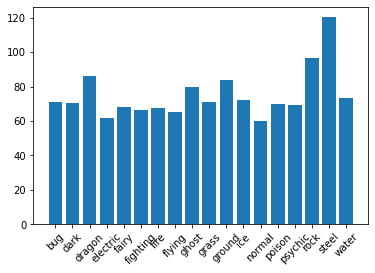

In [196]:
plt.bar(types,typing_info['defense'])
plt.xticks(rotation = 45)

In [198]:
typing_info

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,
bug,70.125000,5617.777778,67.083333,380.430556,70.847222,1.009006e+06,0.883333,56.722222,395.916667,56.652778,62.513889,63.569444,33.083333,3.763889,0.041667
dark,87.793103,8386.206897,42.241379,449.758621,70.517241,1.102720e+06,1.296552,72.551724,490.034483,74.517241,69.068966,75.310345,69.096552,4.275862,0.103448
dragon,106.407407,15265.185185,42.962963,522.777778,86.259259,1.216667e+06,1.937037,79.851852,516.296296,89.592593,84.555556,76.111111,107.125926,4.296296,0.259259
electric,70.820513,7056.410256,68.461538,436.153846,61.820513,1.073312e+06,0.976923,60.512821,380.102564,87.538462,70.051282,85.410256,37.741026,3.461538,0.128205
fairy,62.111111,5902.222222,77.777778,427.166667,68.166667,9.138889e+05,0.794444,73.944444,467.000000,81.500000,87.777778,53.666667,23.555556,4.277778,0.055556
fighting,99.178571,5577.142857,70.000000,414.821429,66.392857,1.076021e+06,1.196429,71.428571,404.035714,50.107143,63.428571,64.285714,58.675000,3.750000,0.000000
fire,81.500000,6670.769231,68.461538,450.634615,67.788462,1.064735e+06,1.155769,68.730769,376.403846,87.730769,71.538462,73.346154,64.126923,3.634615,0.096154
flying,66.666667,13653.333333,76.666667,453.333333,65.000000,1.083333e+06,1.166667,68.000000,690.000000,84.000000,70.000000,99.666667,52.000000,5.666667,0.333333
ghost,72.740741,6731.851852,58.333333,434.703704,79.518519,1.018117e+06,1.251852,63.370370,498.814815,82.444444,78.296296,58.333333,69.570370,4.370370,0.037037
